In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

len_x = 11
len_y = len_x

with open(f"./data/cont_data_{len_x}x{len_y}_reg.pkl", "rb") as f:
    d = pickle.load(f)

In [2]:
print(d["res_s1"]["9.0;10.0"], d["res_s2"]["9.0;10.0"] )
print(sum(d["res_s1"]["9.0;10.0"]), sum(d["res_s2"]["9.0;10.0"]))
print(d["res_p1"]["9.0;10.0"], d["res_p2"]["9.0;10.0"] )
print(sum(d["res_p1"]["9.0;10.0"]), sum(d["res_p2"]["9.0;10.0"]))


[10.0, 10.0, 10.0, 10.0, 10.0, 0.0] [9.000129766399958, 9.999870233600042, 10.0, 10.0, 10.0, 0.0]
50.0 49.0
[0.0, 9.0, 10.0, 10.0, 10.0, 10.0] [0.0, 10.0, 10.0, 10.0, 10.0, 10.0]
49.0 50.0


In [3]:

x = np.linspace(9, 10, len_x)
y = np.linspace(10, 11, len_y)
X, Y = np.meshgrid(x, y)
t = 0
tank = "res_s1"

def compute_M(t, tank):
    M = np.zeros((len_x, len_y))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            M[i][j] = d[tank][f"{x[i]};{y[j]}"][t]
    return(M)

p1_1 = 9, p2_1 = 10 ->      s1_0 = 9, s2_0 = 10
p1_1 = 9.5, p2_1 = 10 ->    s1_0 = 9.5, s2_0 = 10
p1_1 = 10, p2_1 = 10 ->     s1_0 = 10, s2_0 = 10

p1_1 = 9, p2_1 = 10.5 ->    s1_0 = 9.5, s2_0 = 10
p1_1 = 9.5, p2_1 = 10.5 ->  s1_0 = 10, s2_0 = 10
p1_1 = 10, p2_1 = 10.5 ->   s1_0 = 10, s2_0 = 10

p1_1 = 9, p2_1 = 11 ->      s1_0 = 10, s2_0 = 10
p1_1 = 9.5, p2_1 = 11 ->    s1_0 = 10, s2_0 = 10
p1_1 = 10, p2_1 = 11 ->     s1_0 = 10, s2_0 = 10

In [4]:
d["res_flow_j1_p1"].keys()

dict_keys(['9.0;10.0', '9.0;10.1', '9.0;10.2', '9.0;10.3', '9.0;10.4', '9.0;10.5', '9.0;10.6', '9.0;10.7', '9.0;10.8', '9.0;10.9', '9.0;11.0', '9.1;10.0', '9.1;10.1', '9.1;10.2', '9.1;10.3', '9.1;10.4', '9.1;10.5', '9.1;10.6', '9.1;10.7', '9.1;10.8', '9.1;10.9', '9.1;11.0', '9.2;10.0', '9.2;10.1', '9.2;10.2', '9.2;10.3', '9.2;10.4', '9.2;10.5', '9.2;10.6', '9.2;10.7', '9.2;10.8', '9.2;10.9', '9.2;11.0', '9.3;10.0', '9.3;10.1', '9.3;10.2', '9.3;10.3', '9.3;10.4', '9.3;10.5', '9.3;10.6', '9.3;10.7', '9.3;10.8', '9.3;10.9', '9.3;11.0', '9.4;10.0', '9.4;10.1', '9.4;10.2', '9.4;10.3', '9.4;10.4', '9.4;10.5', '9.4;10.6', '9.4;10.7', '9.4;10.8', '9.4;10.9', '9.4;11.0', '9.5;10.0', '9.5;10.1', '9.5;10.2', '9.5;10.3', '9.5;10.4', '9.5;10.5', '9.5;10.6', '9.5;10.7', '9.5;10.8', '9.5;10.9', '9.5;11.0', '9.6;10.0', '9.6;10.1', '9.6;10.2', '9.6;10.3', '9.6;10.4', '9.6;10.5', '9.6;10.6', '9.6;10.7', '9.6;10.8', '9.6;10.9', '9.6;11.0', '9.7;10.0', '9.7;10.1', '9.7;10.2', '9.7;10.3', '9.7;10.4', '9.7;

In [5]:
d["res_s1"]["9.0;10.0"]

# Apply Gaussian smoothing
# smoothed_data = gaussian_filter(data, sigma=sigma)

[10.0, 10.0, 10.0, 10.0, 10.0, 0.0]

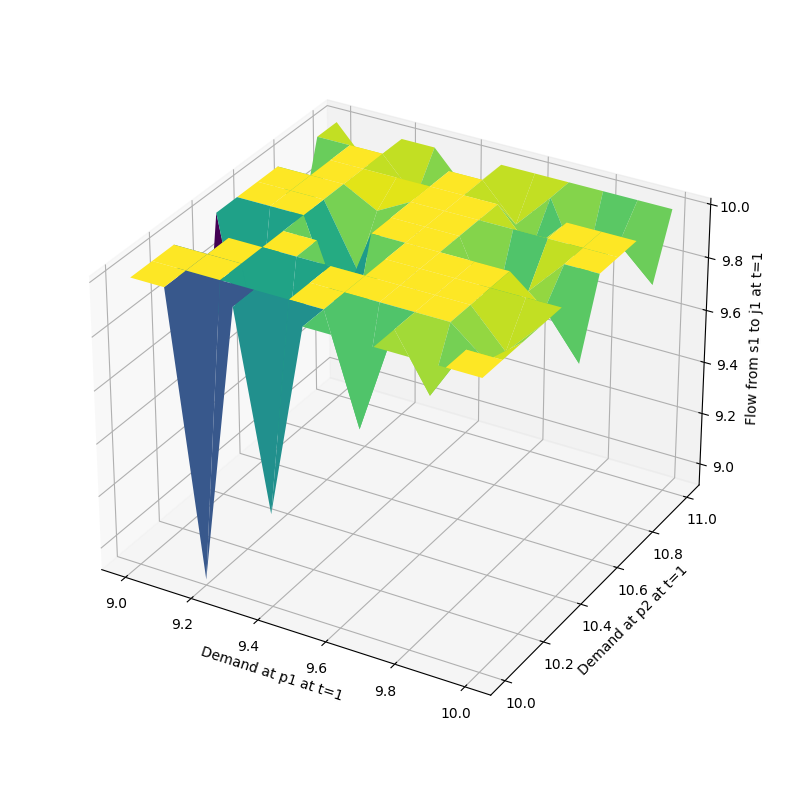

In [20]:


np.random.seed(0)
data = compute_M(3, "res_s2")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, data.T, cmap='viridis')

ax.set_xlabel('Demand at p1 at t=1')
ax.set_ylabel('Demand at p2 at t=1')
ax.set_zlabel('Flow from s1 to j1 at t=1')

ax.set_box_aspect(None, zoom=0.9)
plt.show()

In [47]:
data.mean()

1.7518102242720213

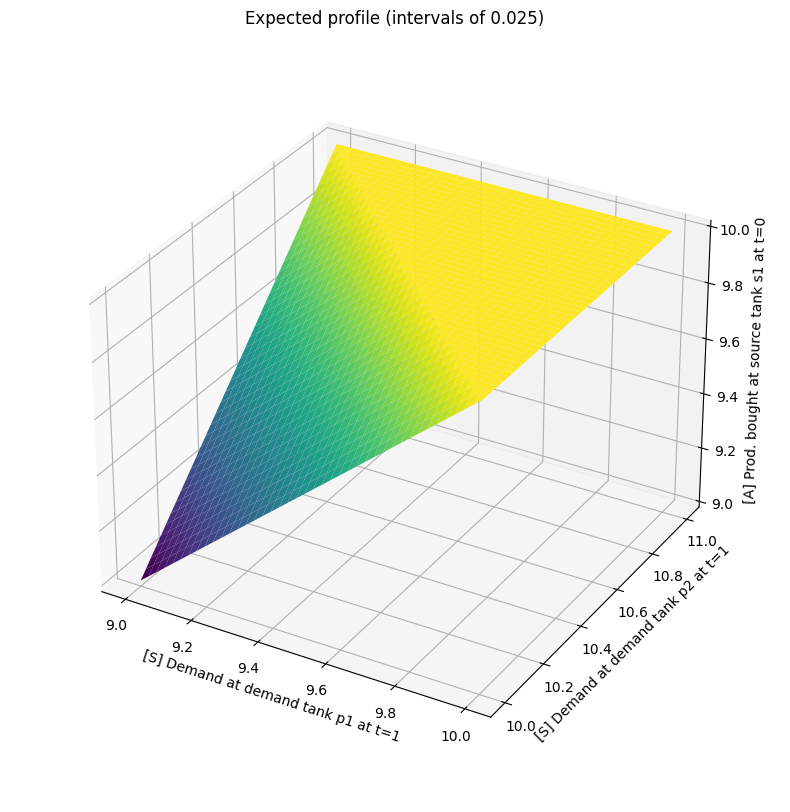

In [8]:
z_exp_s1 = np.zeros((len_x, len_y))
z_exp_s2 = 10*np.ones((len_x, len_y))
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        z_exp_s1[i][j] = min(10, x[i] + y[j] - 10)
# z_exp_s1 = np.array([[9, 9.5, 10], [9.5, 10, 10], [10, 10, 10]])
# z_exp_s2 = np.array([[10, 10, 10], [10, 10, 10], [10, 10, 10]])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X,Y, z_exp_s1, cmap='viridis')

# Add a color bar
# fig.colorbar(surf)
# Customize the plot
ax.set_title(f"Expected profile (intervals of 0.025)")
ax.set_xlabel('[S] Demand at demand tank p1 at t=1')
ax.set_ylabel('[S] Demand at demand tank p2 at t=1')
ax.set_zlabel(f'[A] Prod. bought at source tank s1 at t={t}')

ax.set_box_aspect(None, zoom=0.9)
plt.show()

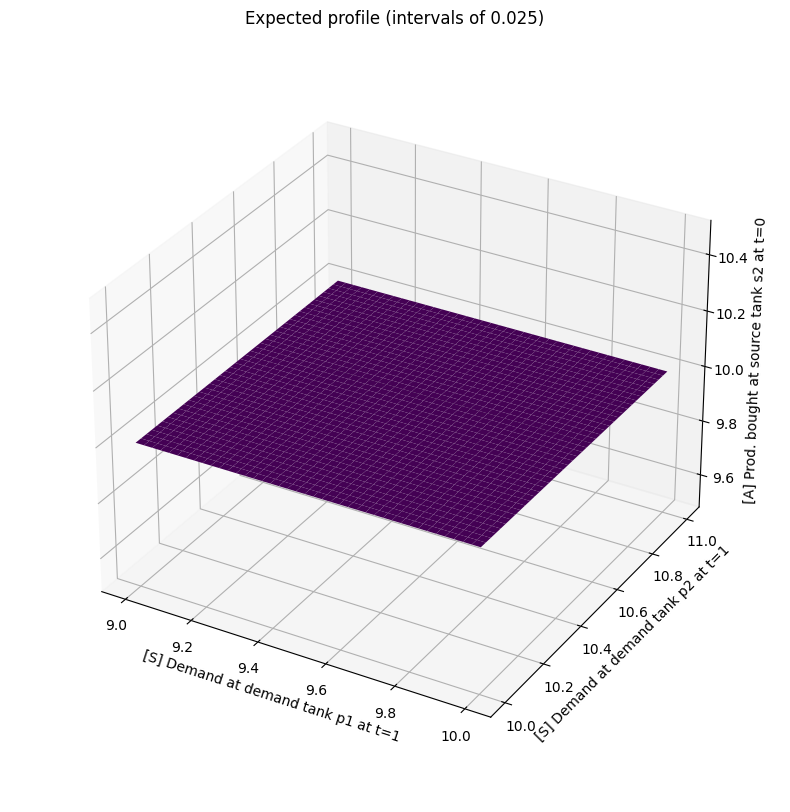

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X,Y, z_exp_s2, cmap='viridis')

# Add a color bar
# fig.colorbar(surf)
# Customize the plot
ax.set_title(f"Expected profile (intervals of 0.025)")
ax.set_xlabel('[S] Demand at demand tank p1 at t=1')
ax.set_ylabel('[S] Demand at demand tank p2 at t=1')
ax.set_zlabel(f'[A] Prod. bought at source tank s2 at t={t}')

ax.set_box_aspect(None, zoom=0.9)
plt.show()

In [97]:
len_x, len_y = 21,21
x = np.linspace(9, 10, len_x)
y = np.linspace(10, 11, len_y)
X, Y = np.meshgrid(x, y)

D = {k: {} for k in ["res_s1", "res_s2", 
                        "res_flow_s1_j1", "res_flow_s1_j2", "res_flow_s1_j3", "res_flow_s1_j4", 
                        "res_flow_s2_j1", "res_flow_s2_j2", "res_flow_s2_j3", "res_flow_s2_j4", 
                        "res_flow_j1_p1", "res_flow_j2_p1", "res_flow_j3_p1", "res_flow_j4_p1", 
                        "res_flow_j1_p2", "res_flow_j2_p2", "res_flow_j3_p2", "res_flow_j4_p2", 
                        "res_p1", "res_p2"]}

points = [(p1, p2) for p1 in x for p2 in y]


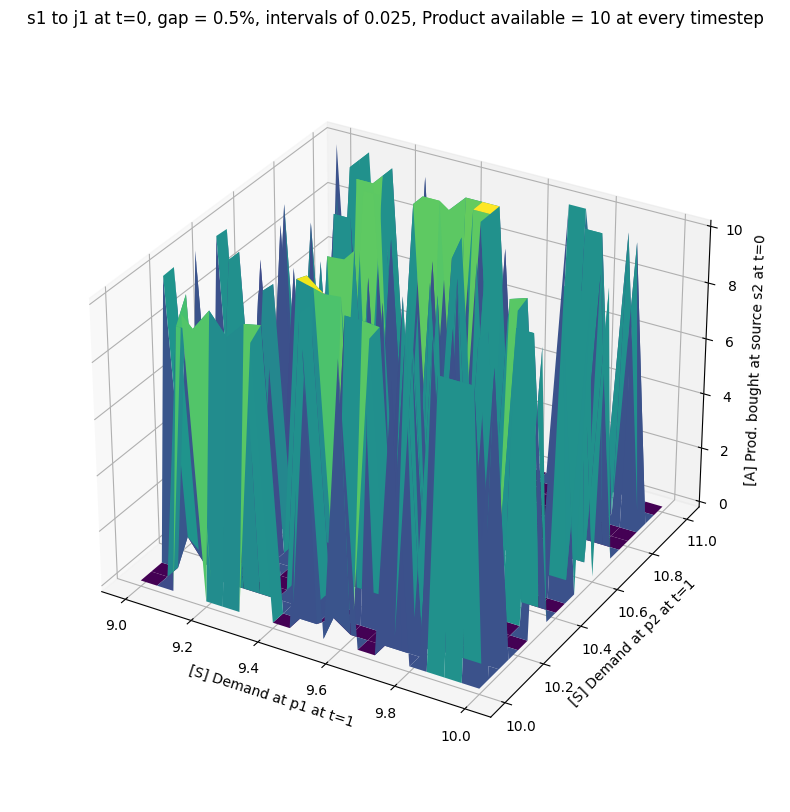

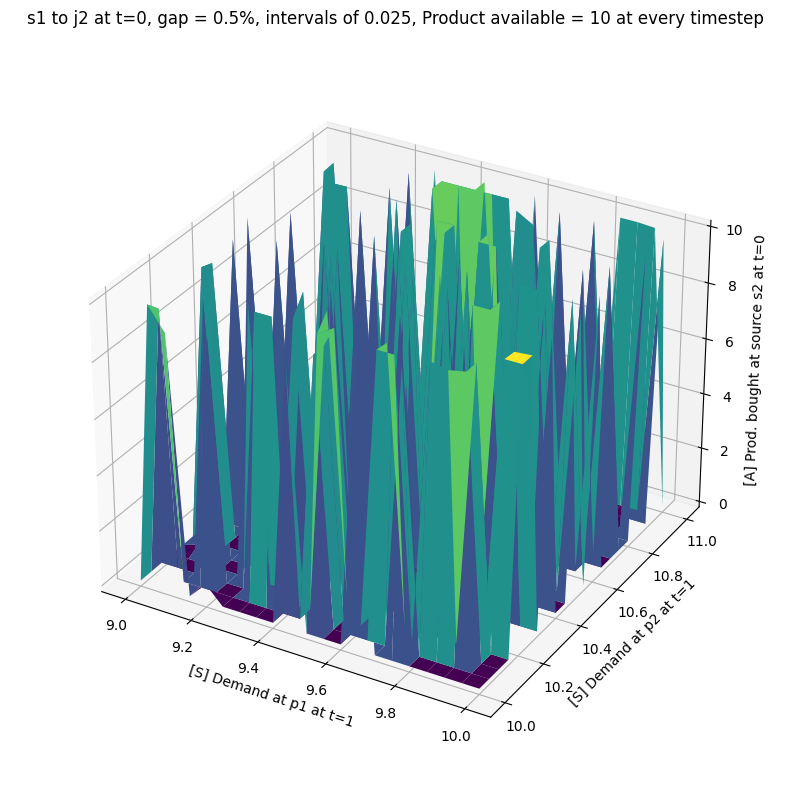

In [99]:
# Create a 3D surface plot
t=0
for tank in ["res_flow_s1_j1", "res_flow_s1_j2"]:
    
    if "flow" in tank:
        tank1, tank2 = tank[-5:-3], tank[-2:]
    else:
        tank_name = tank[-2:]
    
    M = compute_M(t, tank)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, M.T, cmap='viridis')

    # Add a color bar
    # fig.colorbar(surf)
    # Customize the plot
    if "flow" in tank:
        ax.set_title(f"{tank1} to {tank2} at t={t}, gap = 0.5%, intervals of 0.025, Product available = 10 at every timestep")
    else:
        ax.set_title(f"{tank_name} at t={t}, gap = 0.5%, intervals of 0.025, Product available = 10 at every timestep")
        
    ax.set_xlabel('[S] Demand at p1 at t=1')
    ax.set_ylabel('[S] Demand at p2 at t=1')
    if tank_name[0] == "s":
        ax.set_zlabel(f'[A] Prod. bought at source {tank_name} at t={t}')
    elif tank_name[0] == "p":
        ax.set_zlabel(f'[A] Prod. sold at demand {tank_name} at t={t}')
    
    elif tank_name[0] == "j":
        ax.set_zlabel(f'[A] Flow from {tank1} to {tank2} at t={t}')

    ax.set_box_aspect(None, zoom=0.9)
    plt.show()

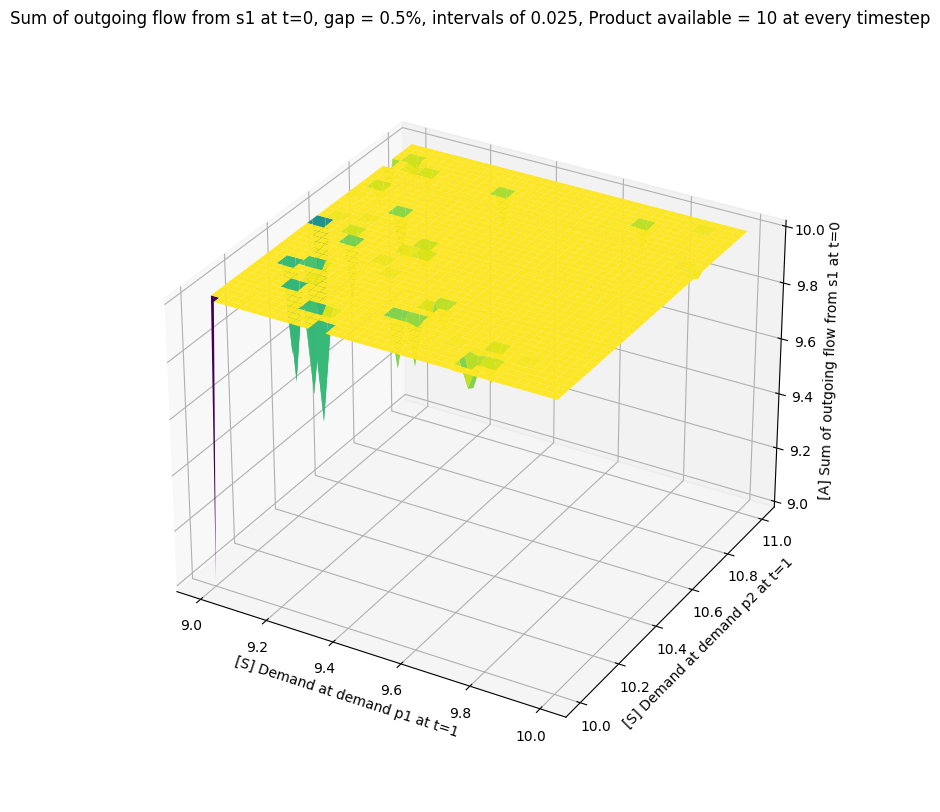

In [19]:
# Create a 3D surface plot
M = np.zeros((len_x, len_y))
t=0
for tank in ["res_flow_s1_j1", "res_flow_s1_j2", "res_flow_s1_j3", "res_flow_s1_j4", 
            #  "res_flow_s2_j1", "res_flow_s2_j2", "res_flow_s2_j3", "res_flow_s2_j4"
             ]:
    
    M += compute_M(t, tank)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, M, cmap='viridis')

# Add a color bar
# fig.colorbar(surf)
# Customize the plot
if "flow" in tank:
    ax.set_title(f"Sum of outgoing flow from s1 at t={t}, gap = 0.5%, intervals of 0.025, Product available = 10 at every timestep")
else:
    ax.set_title(f"{tank_name} at t={t}, gap = 0.5%, intervals of 0.025, Product available = 10 at every timestep")
    
ax.set_xlabel('[S] Demand at demand p1 at t=1')
ax.set_ylabel('[S] Demand at demand p2 at t=1')
ax.set_zlabel(f'[A] Sum of outgoing flow from s1 at t={t}')

ax.set_box_aspect(None, zoom=0.9)
plt.show()

In [27]:
def compute_objective(results_dict, T=6, alpha=0.1, beta=0.1, coef_sym=0.001):
    obj_values = {}
    
    # Get all demand scenarios from any of the dictionary keys
    scenarios = list(results_dict['res_s1'].keys())
    
    for scenario in scenarios:
        # Initialize objective components
        revenue_demands = 0
        cost_sources = 0
        cost_connections = 0
        cost_sym_sources = 0
        cost_sym_flows = 0
        
        # Revenue from demands (betaT_d[p] * demand_sold[p, t] * (1 - 0.01 * t))
        betaT_d = {'p1': 2, 'p2': 1}
        for p, beta_d in betaT_d.items():
            demand_sold = results_dict[f'res_{p}'][scenario]
            for t in range(T):
                revenue_demands += beta_d * demand_sold[t] * (1 - 0.01 * t)
        
        # Cost from sources (betaT_s[s] * offer_bought[s, t] * (1 - 0.01 * t))
        betaT_s = {'s1': 0, 's2': 0}
        for s, beta_s in betaT_s.items():
            offer_bought = results_dict[f'res_{s}'][scenario]
            for t in range(T):
                cost_sources += beta_s * offer_bought[t] * (1 - 0.01 * t)
        
        # Connection costs (alpha * bin + beta * flow)
        # Source to blend flows
        for s in ['s1', 's2']:
            for j in range(1, 5):
                flows = results_dict[f'res_flow_{s}_j{j}'][scenario]
                for t in range(T):
                    if flows[t] > 0:
                        cost_connections += alpha + beta * flows[t]
                    cost_sym_flows += coef_sym * flows[t] * j
        
        # Blend to demand flows
        for j in range(1, 5):
            for p in ['p1', 'p2']:
                flows = results_dict[f'res_flow_j{j}_{p}'][scenario]
                for t in range(T):
                    if flows[t] > 0:
                        cost_connections += alpha + beta * flows[t]
                    cost_sym_flows += coef_sym * flows[t] * (ord(p[1]) - ord('0'))
        
        # Source buying symmetry cost
        for s in ['s1', 's2']:
            bought = results_dict[f'res_{s}'][scenario]
            for t in range(T):
                cost_sym_sources += coef_sym * bought[t] * (ord(s[1]) - ord('0'))
        
        # Total objective
        obj_values[scenario] = [revenue_demands ,cost_sources ,cost_connections ,cost_sym_sources , cost_sym_flows]
    
    return obj_values


In [28]:
compute_objective(d)

{'9.0;10.0': [143.52, 0.0, 21.8, 0.148, 0.3430000000000001],
 '9.0;10.025': [143.54475,
  0.0,
  21.80500000000001,
  0.1490110736414773,
  0.32520570543409083],
 '9.0;10.05': [143.5695, 0.0, 21.810000000000006, 0.1481, 0.2872],
 '9.0;10.075': [143.59425,
  0.0,
  21.815002407409708,
  0.14815004814819407,
  0.28730002407409705],
 '9.0;10.1': [143.619, 0.0, 21.820000000000036, 0.1482, 0.3065020970807297],
 '9.0;10.125': [143.64374999999998,
  0.0,
  21.825000000000003,
  0.14825,
  0.30574999999999997],
 '9.0;10.15': [143.6685, 0.0, 21.830000000000005, 0.14830000000000002, 0.2876],
 '9.0;10.175': [143.69325,
  0.0,
  21.83499992068508,
  0.14917499955028524,
  0.3160499984137015],
 '9.0;10.2': [143.718, 0.0, 21.84000000000004, 0.1484, 0.32700054141611823],
 '9.0;10.225': [143.74275,
  0.0,
  21.944999999999997,
  0.14922497392894715,
  0.3248000324789229],
 '9.0;10.25': [143.76749364578257,
  0.0,
  21.849998662270025,
  0.1484999866227002,
  0.2880000416629284],
 '9.0;10.275': [143.79

In [24]:
d["res_p1"].keys()

dict_keys(['9.0;10.0', '9.0;10.025', '9.0;10.05', '9.0;10.075', '9.0;10.1', '9.0;10.125', '9.0;10.15', '9.0;10.175', '9.0;10.2', '9.0;10.225', '9.0;10.25', '9.0;10.275', '9.0;10.3', '9.0;10.325', '9.0;10.35', '9.0;10.375', '9.0;10.4', '9.0;10.425', '9.0;10.45', '9.0;10.475', '9.0;10.5', '9.0;10.525', '9.0;10.55', '9.0;10.575', '9.0;10.6', '9.0;10.625', '9.0;10.65', '9.0;10.675', '9.0;10.7', '9.0;10.725', '9.0;10.75', '9.0;10.775', '9.0;10.8', '9.0;10.825', '9.0;10.85', '9.0;10.875', '9.0;10.9', '9.0;10.925', '9.0;10.95', '9.0;10.975', '9.0;11.0', '9.025;10.0', '9.025;10.025', '9.025;10.05', '9.025;10.075', '9.025;10.1', '9.025;10.125', '9.025;10.15', '9.025;10.175', '9.025;10.2', '9.025;10.225', '9.025;10.25', '9.025;10.275', '9.025;10.3', '9.025;10.325', '9.025;10.35', '9.025;10.375', '9.025;10.4', '9.025;10.425', '9.025;10.45', '9.025;10.475', '9.025;10.5', '9.025;10.525', '9.025;10.55', '9.025;10.575', '9.025;10.6', '9.025;10.625', '9.025;10.65', '9.025;10.675', '9.025;10.7', '9.025

In [23]:
d.keys()

dict_keys(['res_s1', 'res_s2', 'res_flow_s1_j1', 'res_flow_s1_j2', 'res_flow_s1_j3', 'res_flow_s1_j4', 'res_flow_s2_j1', 'res_flow_s2_j2', 'res_flow_s2_j3', 'res_flow_s2_j4', 'res_flow_j1_p1', 'res_flow_j2_p1', 'res_flow_j3_p1', 'res_flow_j4_p1', 'res_flow_j1_p2', 'res_flow_j2_p2', 'res_flow_j3_p2', 'res_flow_j4_p2', 'res_p1', 'res_p2'])

In [ ]:
profile = "9.0;10.0"

In [ ]:
sum(sum(model.source_blend_flow[s, j, t] * (ord(j[1]) - ord('0')) * (t+1) for s in model.sources for j in model.blenders) for t in model.timestamps) \
sum(sum(model.blend_demand_flow[j, p, t] * (ord(p[1]) - ord('0')) * (t+1) for j in model.blenders for p in model.demands) for t in model.timestamps) \
sum(sum(model.blend_inv[j, t] * (ord(j[1]) - ord('0')) * (t+1) for j in model.blenders) for t in model.timestamps) \
sum(sum(model.source_inv_before_flow[s, t] * (ord(s[1]) - ord('0')) * (t+1) for s in model.sources) for t in model.timestamps) \
sum(sum(model.demand_inv_after_sell[p, t] * (ord(p[1]) - ord('0')) * (t+1) for p in model.demands) for t in model.timestamps)
